In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_MA_journal

In [2]:
numNodes = Compute_Jacobian_MA_journal.numNodes;
numLinks = Compute_Jacobian_MA_journal.numLinks;
numODpairs = Compute_Jacobian_MA_journal.numODpairs;
numZones = Compute_Jacobian_MA_journal.numZones
od_pairs = Compute_Jacobian_MA_journal.od_pairs;
link_list_js = Compute_Jacobian_MA_journal.link_list_js;
link_length_list = Compute_Jacobian_MA_journal.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_MA_journal.jl");
include("extract_data_MA_journal.jl");
include("../Julia_files/tap_MSA.jl");
include("../Julia_files/inverseVI.jl");
include("../Julia_files/demands_adjustment_gradi.jl");

In [4]:
demandsDict

Dict{Any,Any} with 2 entries:
  0 => Dict{Any,Any}(Pair{Any,Any}((58,9),0.0),Pair{Any,Any}((59,54),33.0923),P…
  1 => Dict{Any,Any}(Pair{Any,Any}((58,9),0.0),Pair{Any,Any}((59,54),33.0923),P…

In [5]:
demandsDiffDict[1] = norm(demandsDicToVec(demandsDict[1]) - demandsDicToVec(demandsDict[0]))/
                     norm(demandsDicToVec(demandsDict[0]));

In [6]:
demandsDiffDict[1]

0.0

In [7]:
demandsDict[1]  # the initial demand

Dict{Any,Any} with 5476 entries:
  (58,9)  => 0.0
  (59,54) => 33.0923
  (21,13) => 31.1646
  (53,24) => 0.0
  (64,20) => 5.52813
  (65,20) => 5.52813
  (41,34) => 0.0
  (32,65) => 12.6882
  (56,55) => 0.0
  (62,58) => 14.02
  (16,73) => 0.0
  (16,67) => 0.0
  (57,62) => 21.0932
  (57,74) => 0.0
  (63,12) => 0.0
  (1,22)  => 31.6818
  (24,31) => 0.0
  (6,41)  => 0.0
  (37,55) => 0.0
  (61,48) => 0.0
  (60,46) => 0.0
  (19,26) => 0.0
  (50,27) => 0.0
  (68,4)  => 0.0
  (36,25) => 0.0
  ⋮       => ⋮

In [8]:
link_flow_observ_vec = readstring("../temp_files/link_flow_observ_MA_journal_Apr_PM.json");
link_flow_observ_vec = JSON.parse(link_flow_observ_vec);

In [9]:
link_flow_observ_dict = Dict()

for i = 1:length(ta_data.start_node)
    key = (ta_data.start_node[i], ta_data.end_node[i])
    link_flow_observ_dict[key] = link_flow_observ_vec[i]
end

In [10]:
tapFlowDicDict[0] = link_flow_observ_dict;
tapFlowVecDict[0] = link_flow_observ_vec

258-element Array{Any,1}:
 1290.12  
 1044.06  
 1469.76  
 1379.92  
  232.047 
  180.813 
  132.498 
  323.295 
 1278.34  
 1171.78  
  165.651 
  389.272 
  832.563 
    ⋮     
   34.0524
  842.137 
  639.484 
  375.994 
    0.0   
  409.591 
  322.282 
  255.865 
    0.0   
  151.397 
  191.181 
  107.423 

In [11]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[0]);

In [12]:
arcsDict[0]

Dict{Any,Any} with 258 entries:
  (53,54) => Arc(53,54,2000.0,0.200888,270.114)
  (32,60) => Arc(32,60,2599.32,0.11114,863.482)
  (22,16) => Arc(22,16,7627.74,0.048681,886.288)
  (22,14) => Arc(22,14,2895.85,0.146429,259.93)
  (13,9)  => Arc(13,9,875.0,0.06509,123.8)
  (47,48) => Arc(47,48,1285.01,0.274471,358.456)
  (9,1)   => Arc(9,1,1076.22,0.403219,180.813)
  (17,14) => Arc(17,14,4904.24,0.105394,683.008)
  (34,35) => Arc(34,35,5470.88,0.13036,1105.5)
  (73,50) => Arc(73,50,825.0,0.211827,156.75)
  (35,34) => Arc(35,34,6000.0,0.129099,226.927)
  (11,8)  => Arc(11,8,6000.0,0.085183,1123.21)
  (18,21) => Arc(18,21,8000.0,0.079145,7271.72)
  (36,35) => Arc(36,35,6000.0,0.096513,244.483)
  (38,39) => Arc(38,39,5733.06,0.04926,1180.14)
  (8,4)   => Arc(8,4,6223.71,0.090973,501.043)
  (24,25) => Arc(24,25,4500.0,0.026787,1315.19)
  (52,51) => Arc(52,51,2000.0,0.21205,594.168)
  (45,43) => Arc(45,43,1213.74,0.108835,509.911)
  (29,22) => Arc(29,22,1423.69,0.093035,729.669)
  (51,50) => Ar

In [13]:
deg = 8
c = 1.5
lam = .001

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDict[1], arcsDict[0]);

In [14]:
coeffs_dict[(deg, c, lam, 1)]

9-element Array{Float64,1}:
  1.0       
  0.00651549
 -0.0482734 
  0.113935  
  0.122884  
 -0.59381   
  0.241782  
  0.290378  
  0.054194  

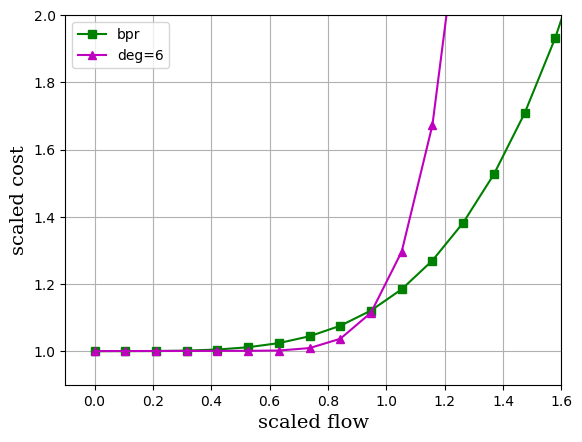

In [15]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "s-g", label="bpr")

PyPlot.plot(xs, zs, "^-m", label="deg=6")
legend(loc="upper left",fancybox="true") 

grid("on")

xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("./results/fitting_MA_journal_iter_$(iterN).pdf")

In [16]:
demandsVecDict[1] = demandsDicToVec(demandsDict[1]);
objFunDict[1] = objF(demandsVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [17]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], coeffs_dict[(deg, c, lam, 1)]);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [18]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[1]);

In [19]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [20]:
linkCostDicDict[1]["0"], link_length_list[1]

(0.2390354471800938,0.238965)

In [21]:
jacobiSpiessDict[1] = Compute_Jacobian_MA_journal.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[1]["$(i)"] for i=0:numLinks-1]);

In [22]:
# maximum number of iterations
N = 100;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [23]:
for iterNumber = 1:N
    
    l = iterNumber;
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], epsilon_1);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDict[l], coeffs_dict[(deg, c, lam, l)], 
    searchDirecDict[l], thetaMaxDict[l], rho, M);
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDict[l+1], arcsDict[0]);

    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_MA_journal.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[l+1]["$(i)"] for i=0:numLinks-1]);
        
    demandsDiffDict[l+1] = norm(demandsVecDict[l+1] - demandsVecDict[0]) / norm(demandsVecDict[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
  
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [24]:
demandsVecDict

Dict{Any,Any} with 6 entries:
  0 => [63.8028,471.819,0.0,0.0,0.0,918.488,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…
  4 => [63.7905,471.883,0.0,0.0,0.081502,918.514,0.0,0.0254284,0.0,0.0  …  0.0,…
  2 => [63.7918,471.876,0.0,0.0,0.0721714,918.511,0.0,0.0224924,0.0,0.0  …  0.0…
  3 => [63.7905,471.883,0.0,0.0,0.0814275,918.514,0.0,0.0254049,0.0,0.0  …  0.0…
  5 => [63.7905,471.883,0.0,0.0,0.081502,918.514,0.0,0.0254284,0.0,0.0  …  0.0,…
  1 => [63.8028,471.819,0.0,0.0,0.0,918.488,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…

In [25]:
norObjFunDict

Dict{Any,Any} with 5 entries:
  4 => 0.975439
  2 => 0.979777
  3 => 0.975503
  5 => 0.975439
  1 => 1.0

In [26]:
coeffs_dict

Dict{Any,Any} with 5 entries:
  (8,1.5,0.001,4) => [1.0,0.00746137,-0.0566458,0.146002,0.07752,-0.592607,0.26…
  (8,1.5,0.001,1) => [1.0,0.00651549,-0.0482734,0.113935,0.122884,-0.59381,0.24…
  (8,1.5,0.001,5) => [1.0,0.00746137,-0.0566458,0.146002,0.07752,-0.592607,0.26…
  (8,1.5,0.001,2) => [1.0,0.00731177,-0.0553563,0.141278,0.0836197,-0.592426,0.…
  (8,1.5,0.001,3) => [1.0,0.00746025,-0.0566362,0.145967,0.0775654,-0.592606,0.…

In [27]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [28]:
outfile = open("./results/demandsDiffDict.json", "w")

JSON.print(outfile, demandsDiffDict)

close(outfile)

In [29]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [30]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [31]:
outfile = open("./results/demandsVecDict.json", "w")

JSON.print(outfile, demandsVecDict)

close(outfile)

In [32]:
outfile = open("./results/demandsDict.json", "w")

JSON.print(outfile, demandsDict)

close(outfile)

In [33]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [34]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)